In [1]:
import pandas as pd
from fredapi import Fred
import sys
import os
import matplotlib.pyplot as plt
# Add config module to sys path
sys.path.insert(0, os.path.abspath('../config'))


# Import API key
from api_keys import fred_api_key


In [2]:
fred = Fred(api_key=f'{fred_api_key}')

In [3]:
data_30year_mortgage = fred.get_series('MORTGAGE30US')

In [4]:
data_30year_mortgage.tail()

2023-11-16    7.44
2023-11-22    7.29
2023-11-30    7.22
2023-12-07    7.03
2023-12-14    6.95
dtype: float64

In [5]:
print(data_30year_mortgage.dtypes)
print(type(data_30year_mortgage))

float64
<class 'pandas.core.series.Series'>


In [6]:
data_30year_mortage_rates_10years = data_30year_mortgage.loc[(data_30year_mortgage.index > '2012-12-31') & 
                                                             (data_30year_mortgage.index < '2023-01-01') ]
data_30year_mortage_rates_10years

2013-01-03    3.34
2013-01-10    3.40
2013-01-17    3.38
2013-01-24    3.42
2013-01-31    3.53
              ... 
2022-12-01    6.49
2022-12-08    6.33
2022-12-15    6.31
2022-12-22    6.27
2022-12-29    6.42
Length: 522, dtype: float64

In [126]:
dfMortageRates = pd.DataFrame(data_30year_mortage_rates_10years)
dfMortageRates.reset_index()
dfMortageRates = dfMortageRates.rename(columns={0 : '30 Year Mortgage Rates'})
dfMortageRates.index.names = ['Date']
dfMortageRates.index = pd.to_datetime(dfMortageRates.index)
print(dfMortageRates.tail())
print(dfMortageRates.dtypes)

            30 Year Mortgage Rates
Date                              
2022-12-01                    6.49
2022-12-08                    6.33
2022-12-15                    6.31
2022-12-22                    6.27
2022-12-29                    6.42
30 Year Mortgage Rates    float64
dtype: object


In [127]:

dfMortageRates = dfMortageRates.reset_index()

dfMortageRates['Date'] = pd.to_datetime(dfMortageRates['Date'])

dfMortageRates['Year'] = dfMortageRates['Date'].dt.year
print(dfMortageRates.dtypes)
print(dfMortageRates.head())

Date                      datetime64[ns]
30 Year Mortgage Rates           float64
Year                               int32
dtype: object
        Date  30 Year Mortgage Rates  Year
0 2013-01-03                    3.34  2013
1 2013-01-10                    3.40  2013
2 2013-01-17                    3.38  2013
3 2013-01-24                    3.42  2013
4 2013-01-31                    3.53  2013


In [128]:
dfMortageRates = dfMortageRates.groupby('Year')['30 Year Mortgage Rates'].mean()
dfMortageRates_ = pd.DataFrame(dfMortageRates)
dfMortageRates_

,30 Year Mortgage Rates
Year,
2013,3.975577
2014,4.168868
2015,3.850577
2016,3.654038
2017,3.989808
2018,4.544615
2019,3.935769
2020,3.111698
2021,2.957692


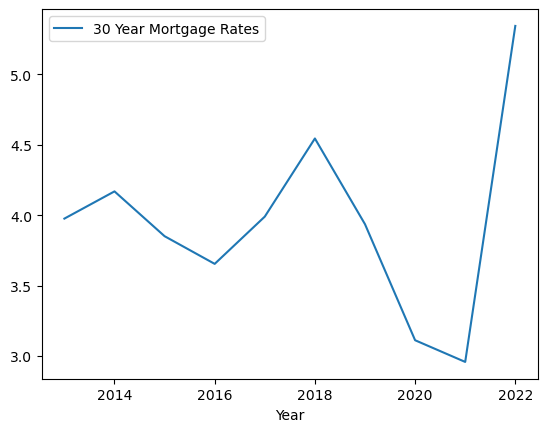

In [130]:
dfMortageRates_.plot(y='30 Year Mortgage Rates', kind='line', use_index=True)
plt.show()

In [9]:
# Indicator ID SSAM - Median Sale Price (Smooth, All Homes, Monthly)",Inventory and sales

# Read Zillow Data - full dataset

df = pd.read_csv("../Resources/ZILLOW_DATA.csv")

In [10]:
# Read Regions dataset

dfRegions = pd.read_csv("../Resources/ZILLOW_REGIONS.csv")

In [11]:
dfIndicators = pd.read_csv("../Resources/ZILLOW_INDICATORS.csv")

In [12]:
df = df.loc[df['indicator_id'] == 'SSAM', :]


In [13]:
dfValue = pd.merge(df, dfRegions, on='region_id')


In [17]:
dfValue.head()

,indicator_id,region_id,date,value,region_type,region
0,SSAM,394521,2020-05-31,153000.0,metro,"Dayton, OH"
1,SSAM,394521,2020-03-31,137583.0,metro,"Dayton, OH"
2,SSAM,394521,2020-02-29,134450.0,metro,"Dayton, OH"
3,SSAM,394521,2020-09-30,166800.0,metro,"Dayton, OH"
4,SSAM,394521,2020-11-30,160233.0,metro,"Dayton, OH"


In [16]:
dfValue.count()

indicator_id    127585
region_id       127585
date            127585
value           127585
region_type     127585
region          127585
dtype: int64

In [19]:
print(dfValue['date'].min())
print(dfValue['date'].max())

2008-02-29
2023-09-30


In [23]:
print(len(dfValue['region'].unique()))

810


In [25]:
dfValue['state']=dfValue['region'].str.split(',',n=1,expand=True)[1].str.strip(' ')
dfValue.head()
#.str.split(';',n=1,expand=True)[0].str.strip(' ')


,indicator_id,region_id,date,value,region_type,region,state
0,SSAM,394521,2020-05-31,153000.0,metro,"Dayton, OH",OH
1,SSAM,394521,2020-03-31,137583.0,metro,"Dayton, OH",OH
2,SSAM,394521,2020-02-29,134450.0,metro,"Dayton, OH",OH
3,SSAM,394521,2020-09-30,166800.0,metro,"Dayton, OH",OH
4,SSAM,394521,2020-11-30,160233.0,metro,"Dayton, OH",OH


In [27]:
dfValue = dfValue.loc[dfValue['state'] == 'OK', :]

dfValue.head()

,indicator_id,region_id,date,value,region_type,region,state
400,SSAM,394564,2022-08-31,154167.0,metro,"Elk City, OK",OK
401,SSAM,394564,2022-07-31,159667.0,metro,"Elk City, OK",OK
402,SSAM,394564,2022-06-30,153667.0,metro,"Elk City, OK",OK
403,SSAM,394564,2022-05-31,160000.0,metro,"Elk City, OK",OK
404,SSAM,394564,2023-02-28,162125.0,metro,"Elk City, OK",OK


In [28]:
print(dfValue.count())

indicator_id    2614
region_id       2614
date            2614
value           2614
region_type     2614
region          2614
state           2614
dtype: int64


In [30]:
dfValue['date'] = pd.to_datetime(dfValue['date'])

In [31]:
dfValue.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
state                   object
dtype: object

In [37]:
dfValue = dfValue.loc[ (dfValue['date'].dt.year > 2012) & (dfValue['date'].dt.year < 2023), :]
dfValue.tail()

,indicator_id,region_id,date,value,region_type,region,state
127072,SSAM,395236,2022-08-31,156250.0,metro,"Woodward, OK",OK
127073,SSAM,395236,2022-09-30,144125.0,metro,"Woodward, OK",OK
127074,SSAM,395236,2022-10-31,132375.0,metro,"Woodward, OK",OK
127075,SSAM,395236,2022-11-30,130500.0,metro,"Woodward, OK",OK
127076,SSAM,395236,2022-12-31,129750.0,metro,"Woodward, OK",OK


In [50]:

median_sales_price_by_year = []
for i in range(2013, 2023):
    dfValue_temp = dfValue.loc[dfValue['date'].dt.year == i,:]
    median_sales_price_by_year.append(dfValue_temp.groupby("region")["value"].mean())

In [51]:
median_sales_price_by_year

[region
 Ardmore, OK          105885.416667
 Bartlesville, OK     109200.000000
 Duncan, OK            78541.666667
 Enid, OK             106166.666667
 Lawton, OK            99145.833333
 McAlester, OK         86375.000000
 Muskogee, OK          83992.166667
 Oklahoma City, OK    120593.750000
 Shawnee, OK           87177.750000
 Stillwater, OK       125322.916667
 Tahlequah, OK         94248.083333
 Tulsa, OK            126729.166667
 Name: value, dtype: float64,
 region
 Ada, OK              100750.000000
 Ardmore, OK          114812.500000
 Bartlesville, OK     116479.416667
 Duncan, OK            81052.083333
 Durant, OK           109100.000000
 Enid, OK             106145.833333
 Lawton, OK            99962.500000
 McAlester, OK         84989.583333
 Miami, OK             64000.000000
 Muskogee, OK          89962.500000
 Oklahoma City, OK    126735.500000
 Ponca City, OK        79787.083333
 Shawnee, OK           87533.333333
 Stillwater, OK       132493.750000
 Tahlequah, OK    

In [52]:
median_sales_by_metro = pd.DataFrame(dfValue['region'].unique())

median_sales_by_metro = median_sales_by_metro.rename(columns= {0 : 'region'})

median_sales_by_metro = median_sales_by_metro.set_index('region')

median_sales_by_metro

""
region
"Elk City, OK"
"Tahlequah, OK"
"Tulsa, OK"
"Ardmore, OK"
"Oklahoma City, OK"
"Lawton, OK"
"Shawnee, OK"
"Enid, OK"
"Bartlesville, OK"


In [53]:
year = 2013
for median_sales in median_sales_price_by_year:
    print(median_sales)
    median_sales_by_metro[year] = median_sales
    year += 1

region
Ardmore, OK          105885.416667
Bartlesville, OK     109200.000000
Duncan, OK            78541.666667
Enid, OK             106166.666667
Lawton, OK            99145.833333
McAlester, OK         86375.000000
Muskogee, OK          83992.166667
Oklahoma City, OK    120593.750000
Shawnee, OK           87177.750000
Stillwater, OK       125322.916667
Tahlequah, OK         94248.083333
Tulsa, OK            126729.166667
Name: value, dtype: float64
region
Ada, OK              100750.000000
Ardmore, OK          114812.500000
Bartlesville, OK     116479.416667
Duncan, OK            81052.083333
Durant, OK           109100.000000
Enid, OK             106145.833333
Lawton, OK            99962.500000
McAlester, OK         84989.583333
Miami, OK             64000.000000
Muskogee, OK          89962.500000
Oklahoma City, OK    126735.500000
Ponca City, OK        79787.083333
Shawnee, OK           87533.333333
Stillwater, OK       132493.750000
Tahlequah, OK         93458.333333
Tulsa, OK    

In [54]:
median_sales_by_metro

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,,
"Elk City, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156875.250000
"Tahlequah, OK",94248.083333,93458.333333,96865.250000,96349.750000,102850.000000,113833.333333,118762.500000,140495.833333,160687.500000,166408.333333
"Tulsa, OK",126729.166667,130095.833333,136604.166667,138558.916667,147541.666667,150326.083333,158052.083333,178756.250000,199658.333333,218666.666667
"Ardmore, OK",105885.416667,114812.500000,116666.666667,115675.916667,113291.666667,130758.750000,123864.333333,146083.333333,178337.083333,173200.000000
"Oklahoma City, OK",120593.750000,126735.500000,137262.500000,141998.625000,147336.666667,150141.666667,163937.500000,177729.166667,192583.333333,216000.000000
"Lawton, OK",99145.833333,99962.500000,95693.041667,88843.708333,98197.916667,110439.583333,123520.833333,132000.000000,132833.333333,139287.500000
"Shawnee, OK",87177.750000,87533.333333,93770.833333,99940.333333,111162.500000,105708.333333,118979.166667,137787.500000,149354.166667,153462.500000
"Enid, OK",106166.666667,106145.833333,115595.000000,119927.083333,111354.166667,115562.500000,124104.166667,136997.916667,134685.416667,140912.500000
"Bartlesville, OK",109200.000000,116479.416667,108908.500000,111770.833333,120160.583333,114303.166667,124897.916667,126093.750000,148614.583333,161245.833333


In [55]:
median_sales_by_metro.isna().sum()

2013    8
2014    4
2015    4
2016    4
2017    4
2018    4
2019    3
2020    1
2021    1
2022    0
dtype: int64

In [57]:
len(median_sales_by_metro.index.unique())

20

In [58]:
median_sales_by_metro.index.unique()

Index(['Elk City, OK', 'Tahlequah, OK', 'Tulsa, OK', 'Ardmore, OK',
       'Oklahoma City, OK', 'Lawton, OK', 'Shawnee, OK', 'Enid, OK',
       'Bartlesville, OK', 'Muskogee, OK', 'McAlester, OK', 'Stillwater, OK',
       'Duncan, OK', 'Durant, OK', 'Ponca City, OK', 'Ada, OK', 'Miami, OK',
       'Altus, OK', 'Weatherford, OK', 'Woodward, OK'],
      dtype='object', name='region')

In [60]:
# Missing data for certain metros
median_sales_by_metro = median_sales_by_metro.dropna()

In [61]:
median_sales_by_metro.isna().sum()

2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [62]:
median_sales_by_metro.index.unique()

Index(['Tahlequah, OK', 'Tulsa, OK', 'Ardmore, OK', 'Oklahoma City, OK',
       'Lawton, OK', 'Shawnee, OK', 'Enid, OK', 'Bartlesville, OK',
       'Muskogee, OK', 'McAlester, OK', 'Stillwater, OK', 'Duncan, OK'],
      dtype='object', name='region')

In [63]:
median_sales_by_metro

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,,
"Tahlequah, OK",94248.083333,93458.333333,96865.250000,96349.750000,102850.000000,113833.333333,118762.500000,140495.833333,160687.500000,166408.333333
"Tulsa, OK",126729.166667,130095.833333,136604.166667,138558.916667,147541.666667,150326.083333,158052.083333,178756.250000,199658.333333,218666.666667
"Ardmore, OK",105885.416667,114812.500000,116666.666667,115675.916667,113291.666667,130758.750000,123864.333333,146083.333333,178337.083333,173200.000000
"Oklahoma City, OK",120593.750000,126735.500000,137262.500000,141998.625000,147336.666667,150141.666667,163937.500000,177729.166667,192583.333333,216000.000000
"Lawton, OK",99145.833333,99962.500000,95693.041667,88843.708333,98197.916667,110439.583333,123520.833333,132000.000000,132833.333333,139287.500000
"Shawnee, OK",87177.750000,87533.333333,93770.833333,99940.333333,111162.500000,105708.333333,118979.166667,137787.500000,149354.166667,153462.500000
"Enid, OK",106166.666667,106145.833333,115595.000000,119927.083333,111354.166667,115562.500000,124104.166667,136997.916667,134685.416667,140912.500000
"Bartlesville, OK",109200.000000,116479.416667,108908.500000,111770.833333,120160.583333,114303.166667,124897.916667,126093.750000,148614.583333,161245.833333
"Muskogee, OK",83992.166667,89962.500000,93512.500000,92375.000000,88995.833333,92452.083333,108270.833333,117333.333333,134358.333333,146083.333333


In [65]:
median_sales_diff_by_zip = pd.DataFrame(median_sales_by_metro.index)

median_sales_diff_by_zip = median_sales_diff_by_zip.rename(columns= {0 : 'region'})

median_sales_diff_by_zip = median_sales_diff_by_zip.set_index('region')

median_sales_diff_by_zip

""
region
"Tahlequah, OK"
"Tulsa, OK"
"Ardmore, OK"
"Oklahoma City, OK"
"Lawton, OK"
"Shawnee, OK"
"Enid, OK"
"Bartlesville, OK"
"Muskogee, OK"


In [66]:
start_year = 2014
end_year = 2023
for i in range(2014, 2023):
    median_sales_diff_by_zip[i] = ((median_sales_by_metro[i] - median_sales_by_metro[i -1]) / median_sales_by_metro[i-1]) * 100

median_sales_diff_by_zip


,2014,2015,2016,2017,2018,2019,2020,2021,2022
region,,,,,,,,,
"Tahlequah, OK",-0.837948,3.645386,-0.532183,6.746515,10.678982,4.330161,18.299828,14.371719,3.560223
"Tulsa, OK",2.656584,5.002722,1.430959,6.482982,1.887207,5.139494,13.099585,11.693064,9.520431
"Ardmore, OK",8.430890,1.614952,-0.849214,-2.061146,15.417801,-5.272624,17.938174,22.079007,-2.880547
"Oklahoma City, OK",5.092926,8.306276,3.450414,3.759221,1.903803,9.188544,8.412759,8.357754,12.159238
"Lawton, OK",0.823702,-4.271060,-7.157609,10.528836,12.466320,11.844711,6.864564,0.631313,4.858846
"Shawnee, OK",0.407883,7.125857,6.579338,11.228867,-4.906481,12.554198,15.808090,8.394569,2.750732
"Enid, OK",-0.019623,8.902061,3.747639,-7.148441,3.779233,7.391383,10.389458,-1.687982,4.623428
"Bartlesville, OK",6.666132,-6.499789,2.628200,7.506207,-4.874657,9.268991,0.957449,17.860388,8.499334
"Muskogee, OK",7.108203,3.946089,-1.216415,-3.658097,3.883609,17.110215,8.370214,14.509943,8.726664


In [67]:
median_sales_by_year = median_sales_diff_by_zip.T

median_sales_by_year


region,"Tahlequah, OK","Tulsa, OK","Ardmore, OK","Oklahoma City, OK","Lawton, OK","Shawnee, OK","Enid, OK","Bartlesville, OK","Muskogee, OK","McAlester, OK","Stillwater, OK","Duncan, OK"
2014,-0.837948,2.656584,8.430890,5.092926,0.823702,0.407883,-0.019623,6.666132,7.108203,-1.603956,5.721885,3.196286
2015,3.645386,5.002722,1.614952,8.306276,-4.271060,7.125857,8.902061,-6.499789,3.946089,3.321485,-0.542478,-0.025704
2016,-0.532183,1.430959,-0.849214,3.450414,-7.157609,6.579338,3.747639,2.628200,-1.216415,15.207687,14.891229,10.309808
2017,6.746515,6.482982,-2.061146,3.759221,10.528836,11.228867,-7.148441,7.506207,-3.658097,1.626770,1.292125,-6.712504
2018,10.678982,1.887207,15.417801,1.903803,12.466320,-4.906481,3.779233,-4.874657,3.883609,1.997974,1.418286,6.645846
2019,4.330161,5.139494,-5.272624,9.188544,11.844711,12.554198,7.391383,9.268991,17.110215,13.556898,8.018325,-3.010425
2020,18.299828,13.099585,17.938174,8.412759,6.864564,15.808090,10.389458,0.957449,8.370214,16.179146,5.310020,19.584541
2021,14.371719,11.693064,22.079007,8.357754,0.631313,8.394569,-1.687982,17.860388,14.509943,14.950006,6.356421,10.491234
2022,3.560223,9.520431,-2.880547,12.159238,4.858846,2.750732,4.623428,8.499334,8.726664,8.131157,5.070859,9.373113


In [68]:
max_median_sales = []

for index, row in median_sales_by_year.iterrows():
     max_median_sales.append({ 'year' : index, 'region' : row.idxmax(), 'change' : row.max()})

max_returns_per_year = pd.DataFrame(max_median_sales)

max_returns_per_year


,year,region,change
0,2014,"Ardmore, OK",8.430890
1,2015,"Enid, OK",8.902061
2,2016,"McAlester, OK",15.207687
3,2017,"Shawnee, OK",11.228867
4,2018,"Ardmore, OK",15.417801
5,2019,"Muskogee, OK",17.110215
6,2020,"Duncan, OK",19.584541
7,2021,"Ardmore, OK",22.079007
8,2022,"Oklahoma City, OK",12.159238


In [133]:
average_median_sales_df = pd.DataFrame(median_sales_diff_by_zip.mean())
average_median_sales_df = average_median_sales_df.rename(columns= {0 : 'Average Sales Price'})
average_median_sales_df.index.name = 'Year'
average_median_sales_df

,Average Sales Price
Year,
2014,3.136914
2015,2.543816
2016,4.040821
2017,2.465944
2018,4.191494
2019,7.509989
2020,11.767819
2021,10.667286
2022,6.199456


In [134]:
average_median_sales_mortgage_rates_df = pd.merge(dfMortageRates_, average_median_sales_df, on="Year")
average_median_sales_mortgage_rates_df

,30 Year Mortgage Rates,Average Sales Price
Year,,
2014,4.168868,3.136914
2015,3.850577,2.543816
2016,3.654038,4.040821
2017,3.989808,2.465944
2018,4.544615,4.191494
2019,3.935769,7.509989
2020,3.111698,11.767819
2021,2.957692,10.667286
2022,5.344038,6.199456


<Axes: xlabel='Year'>

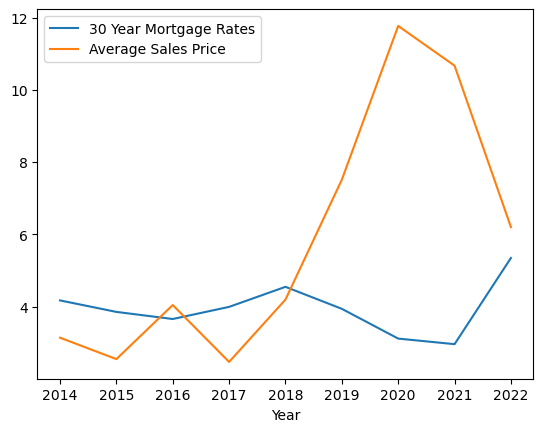

In [135]:
average_median_sales_mortgage_rates_df.plot(kind='line')